In [ ]:
import pandas as pd
data = {'max_temp': []}
output = pd.DataFrame(data)

In [ ]:
df = pd.read_csv(r'/content/MIA.csv')

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas
import requests_cache
import openmeteo_requests
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 25.7743,
	"longitude": -80.1937,
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "snowfall", "wind_speed_10m", "wind_gusts_10m"],
	"daily": "temperature_2m_max",
	"start_date": "2024-04-04",
	"end_date": "2024-04-04"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_rain = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(6).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 25.77291488647461°N -80.19830322265625°E
Elevation 6.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                        date  temperature_2m  relative_humidity_2m  \
0  2024-04-04 00:00:00+00:00       26.119501                  83.0   
1  2024-04-04 01:00:00+00:00       26.169500                  83.0   
2  2024-04-04 02:00:00+00:00       25.219501                  89.0   
3  2024-04-04 03:00:00+00:00       24.769501                  88.0   
4  2024-04-04 04:00:00+00:00       24.769501                  83.0   
5  2024-04-04 05:00:00+00:00       24.269501                  84.0   
6  2024-04-04 06:00:00+00:00       24.719501                  85.0   
7  2024-04-04 07:00:00+00:00       25.169500                  77.0   
8  2024-04-04 08:00:00+00:00       24.719501                  77.0   
9  2024-04-04 09:00:00+00:00       24.569500                  83.0   
10 2024-04-04 10:00:00+00:00       23.619501                  94.0   
11 2024-04-04 11:00:00+00:00       

In [ ]:
hourly_dataframe.drop(columns=['date'],inplace=True)

In [ ]:
print(df)

                            date  temperature_2m  relative_humidity_2m  \
0      2014-01-01 00:00:00+00:00       22.900000             72.525500   
1      2014-01-01 01:00:00+00:00       23.000000             71.634750   
2      2014-01-01 02:00:00+00:00       23.050000             73.009910   
3      2014-01-01 03:00:00+00:00       23.100000             75.581810   
4      2014-01-01 04:00:00+00:00       23.100000             77.253790   
...                          ...             ...                   ...   
87667  2024-01-01 19:00:00+00:00       21.243500             59.123810   
87668  2024-01-01 20:00:00+00:00       21.293499             57.796810   
87669  2024-01-01 21:00:00+00:00       20.943500             56.212055   
87670  2024-01-01 22:00:00+00:00       19.793499             65.290820   
87671  2024-01-01 23:00:00+00:00       16.743500             76.765940   

       dew_point_2m  precipitation  rain  snowfall  wind_speed_10m  \
0         17.700000            0.0   0.0 

In [ ]:
df.drop(columns=['wind_speed_100m'],inplace=True)

In [ ]:
print(df.columns)

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'wind_speed_10m',
       'wind_gusts_10m'],
      dtype='object')


In [ ]:
df.drop(columns=['date'],inplace=True)

In [ ]:
df

,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m
0,22.900000,72.525500,17.700000,0.0,0.0,0.0,21.897945,42.480000
1,23.000000,71.634750,17.600000,0.0,0.0,0.0,22.668570,42.839996
2,23.050000,73.009910,17.950000,0.0,0.0,0.0,23.441502,42.480000
3,23.100000,75.581810,18.550000,0.0,0.0,0.0,24.192429,42.480000
4,23.100000,77.253790,18.900000,0.1,0.1,0.0,25.284714,41.399998
...,...,...,...,...,...,...,...,...
87667,21.243500,59.123810,12.943500,0.0,0.0,0.0,4.802999,15.480000
87668,21.293499,57.796810,12.643499,0.0,0.0,0.0,6.287130,16.199999
87669,20.943500,56.212055,11.893499,0.0,0.0,0.0,6.519877,16.199999
87670,19.793499,65.290820,13.093500,0.0,0.0,0.0,5.351785,14.400000


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = df[['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m']]
y = df['temperature_2m']

X = pd.DataFrame(X, columns=['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m'])
y = pd.DataFrame(y, columns=['temperature_2m'])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)


Epoch 1/30
2192/2192 [==============================] - 11s 4ms/step - loss: 0.0224
Epoch 2/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0131
Epoch 3/30
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0129
Epoch 4/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0128
Epoch 5/30
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0127
Epoch 6/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0126
Epoch 7/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0125
Epoch 8/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0125
Epoch 9/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0124
Epoch 10/30
2192/2192 [==============================] - 13s 6ms/step - loss: 0.0123
Epoch 11/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0123
Epoch 12/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0122

In [ ]:
import numpy as np
# Iterate over each row in hourly_dataframe
for index, row in hourly_dataframe.iterrows():
    # input_data = np.array([[row['relative_humidity_2m'],
    #                         row['precipitation'],
    #                         row['rain'],
    #                         row['snowfall'],
    #                         row['wind_speed_10m'],
    #                         row['wind_gusts_10m']]])
    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step
     max_temp
0   25.286703
1   24.238953
2   24.919678
3   24.674488
4   25.561567
5   25.026833
6   25.764320
7   26.570162
8   25.730991
9   25.766211
10  23.443771
11  23.628515
12  25.178383
13  24.537239
14  25.035824
15  25.119133
16  23.814577
17  25.064112
18  24.016195
19  23.414436
20  25.232965
21  22.910467
22  24.705839
23  25.550272


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model_lstm = Sequential()
model_lstm.add(LSTM(50,
                    input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)

Epoch 1/60
2192/2192 [==============================] - 11s 4ms/step - loss: 0.0281
Epoch 2/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0152
Epoch 3/60
2192/2192 [==============================] - 8s 3ms/step - loss: 0.0148
Epoch 4/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0145
Epoch 5/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0143
Epoch 6/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0143
Epoch 7/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0143
Epoch 8/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0143
Epoch 9/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0142
Epoch 10/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0142
Epoch 11/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0142
Epoch 12/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0142


In [ ]:
import numpy as np
# Iterate over each row in hourly_dataframe
for index, row in hourly_dataframe.iterrows():

    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step
     max_temp
0   25.041313
1   25.041315
2   25.041311
3   25.041311
4   25.041311
5   25.041309
6   25.041309
7   25.041309
8   25.041311
9   25.041315
10  25.041311
11  25.041311
12  25.041315
13  25.041315
14  25.041317
15  25.041319
16  25.041323
17  25.041327
18  25.041323
19  25.041328
20  25.041330
21  25.041336
22  25.041328
23  25.041328


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Here We take the max value of the temperature we obtained from our prediction

In [ ]:
max_temp_max = output['max_temp'].max()

The next cell is the actual max temp recorded today obtained from the weather api

In [ ]:
daily_dataframe.temperature_2m_max[0]

26.1695

In [ ]:
a=daily_dataframe.temperature_2m_max[0]
a=(a*9/5)+32
b=max_temp_max
c=(max_temp_max*9/5)+32
Offset_temp = max_temp_max-daily_dataframe.temperature_2m_max[0]
print("Offset_temp in Celsius is",b-daily_dataframe.temperature_2m_max[0])
print("Offset Temp in Farenheit is",c-a)

Offset_temp in Celsius is -1.128164291381836
Offset Temp in Farenheit is -2.030695724487302


 **Offset Temp mean how off the predicted values are from the actual values*

In [ ]:
print(max_temp_max,"This is in Degree Celsius(Predicted)")
max_temp_max=(max_temp_max * 9/5) + 32
print(max_temp_max,"This is in Farenheit(Predicted)")

25.041336059570312 This is in Degree Celsius(Predicted)
77.07440490722657 This is in Farenheit(Predicted)


In [ ]:
import json
data = {'max_temp_max': max_temp_max}
file_path = '/content/max_temp_max.json'
with open(file_path, 'w') as json_file:
    json.dump(data, json_file)

print("Value saved to", file_path)


Value saved to /content/max_temp_max.json


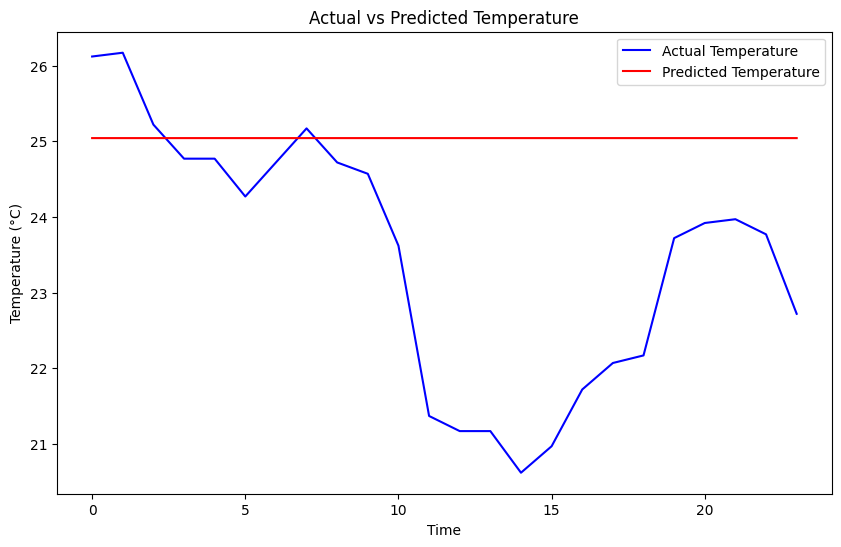

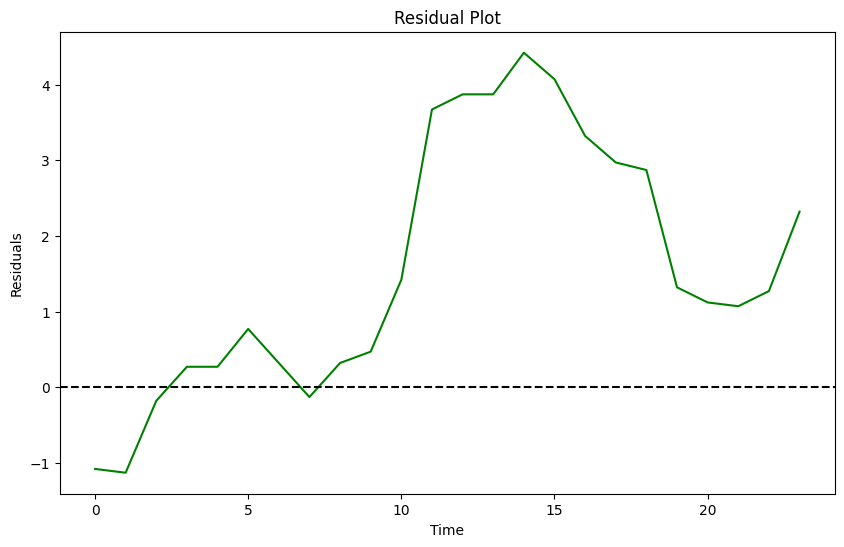

Mean Absolute Error (MAE): 1.7728798389434814


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['temperature_2m'], label='Actual Temperature', color='blue')
plt.plot(hourly_dataframe.index, output['max_temp'], label='Predicted Temperature', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

residuals = output['max_temp'] - hourly_dataframe['temperature_2m']

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, residuals, color='green')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



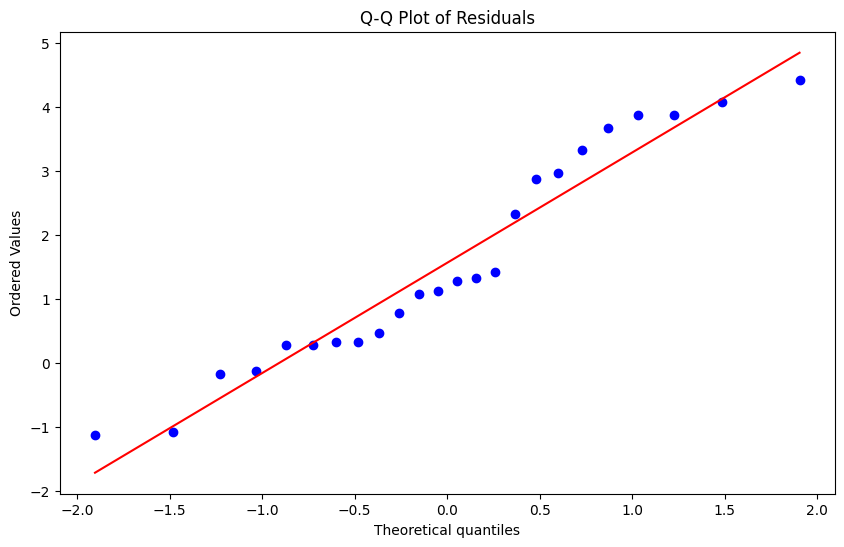

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


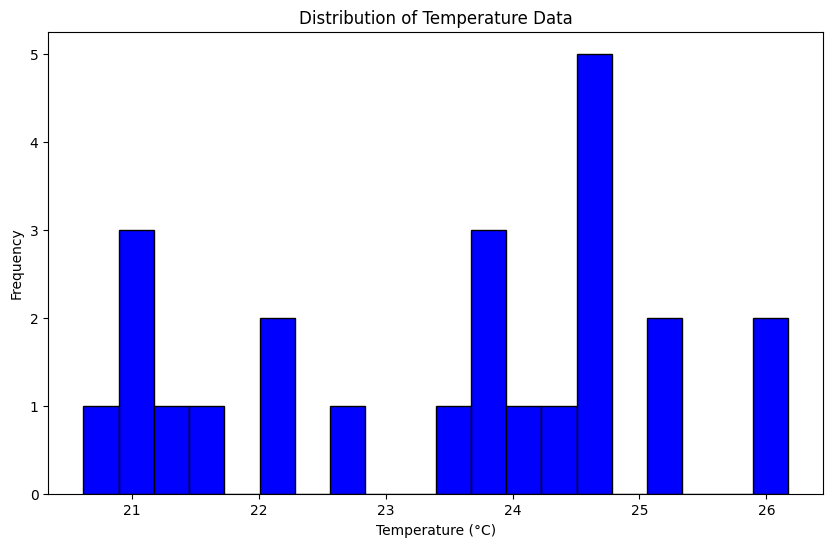

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_dataframe['temperature_2m'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Data')
plt.show()
